<a href="https://colab.research.google.com/github/Nhat260501/Title-of-homework-1/blob/main/VNbanknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Khai báo và sử dụng các thư viện sau
import tensorflow as tf
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
import os
from PIL import Image
import matplotlib.pyplot as plt
from keras import layers, models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from IPython.display import clear_output
from keras.models import load_model

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
dataset_url = "/content/drive/MyDrive/VNbanknotes /Train2"
data_dir = pathlib.Path(dataset_url)

batch_size = 32 # quét 32 file 1 lần
img_height = 200 # chiều cao bức ảnh
img_width = 200 # Chiều rộng bức ảnh

In [37]:
# Tạo file train với tỉ lệ 80% file data
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_url,
  validation_split = 0.2,
  subset = "training",
  seed = 100,
  image_size = (img_height, img_width),
  batch_size = batch_size)

# Tạo file test với tỉ lệ 20% file data
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_url,
  validation_split = 0.2,
  subset = "validation",
  seed = 100,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 910 files belonging to 7 classes.
Using 728 files for training.
Found 910 files belonging to 7 classes.
Using 182 files for validation.


In [38]:
# lấy tên các thư mục để làm nhãn cho dữ liệu train
class_names = train_ds.class_names
print(class_names)

['005000', '010000', '020000', '050000', '100000', '200000', '500000']


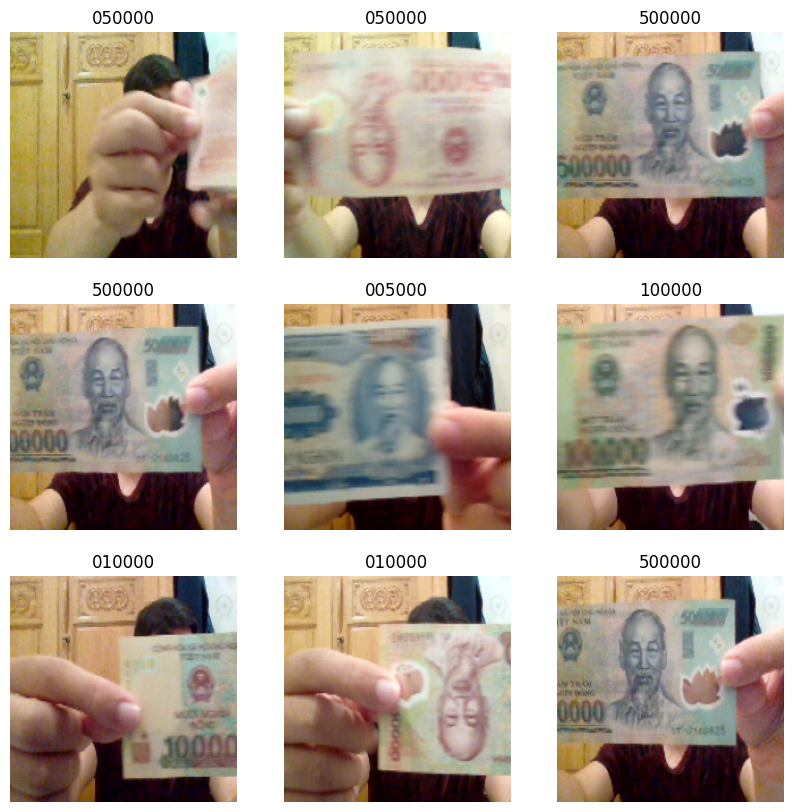

In [39]:
# In ra một số ảnh thuộc dữ liệu train
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [40]:
# kiểm tra kiểu dữ liệu trong dữ liệu train
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32,)


In [41]:
num_classes = len(class_names)
# Tạo mô hình Sequential
model = Sequential()
# Chuẩn hóa giá trị pixel từ 0-255 về 0-1
model.add(Rescaling(1./255))

# Tạo lớp Convolution với mặt nạ 3x3, activation là hàm phi tuyến
model.add(Conv2D(32, kernel_size = 3, activation = "relu", 
                 input_shape = (200, 200, 3), padding = "same"))
model.add(MaxPooling2D((2, 2), padding = "same"))

model.add(Conv2D(64, kernel_size = 3, activation = "relu", padding = "same"))
model.add(MaxPooling2D((2, 2), padding = "same"))

model.add(Conv2D(128, kernel_size = 3, activation = "relu", padding = "same"))
model.add(MaxPooling2D((2, 2), padding = "same"))

# Chuyển đổi đầu ra các lớp convolution thành mảng 1 chiều
model.add(Flatten())

# Tạo lớp ẩn
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

# Biên dịch Mô hình, ở đây sử dụng SparseCategoricalCrossentropy để tính toán mất mát của mô hình
# dựa trên xác suất dự đoán của mô hình và chỉ số của lớp thực sự của dữ liệu.
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [44]:
# Tạo hàm callback, Trong đó
# class chứa câu lệnh được thực hiện khi két thúc 1 epoch
class DisplayCallback(Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True) # Xóa nội dung hiện tại trên console

# EarlyStopping: Dừng đào tạo khi một số liệu được theo dõi đã ngừng cải thiện.
# ReduceLROnPlateau: Giảm tỷ lệ học tập khi một số liệu đã ngừng cải thiện.
# ModelCheckpoint: lưu trữ các check point tốt nhất sau mỗi epoch
callbacks = [DisplayCallback(), 
            EarlyStopping(patience=15, verbose=1),                  
            ReduceLROnPlateau(patience=5, verbose=1),
            ModelCheckpoint('/content/drive/MyDrive/VNbanknotes /VNbanknotes2.h5', 
                            verbose=1, save_best_only=True)]

In [45]:
# train mô hình 
history = model.fit(
          train_ds,
          validation_data = val_ds,
          epochs = 50,
          callbacks = callbacks)


Epoch 16: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.

Epoch 16: val_loss did not improve from 0.16583
23/23 [==============================] - 87s 4s/step - loss: 3.5077e-04 - accuracy: 1.0000 - val_loss: 0.1659 - val_accuracy: 0.9670 - lr: 1.0000e-08
Epoch 16: early stopping


In [46]:
model_1=load_model('/content/drive/MyDrive/VNbanknotes /VNbanknotes2.h5')

In [47]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 128)      

In [48]:
# Đánh giá độ chính xác của mô hình 
Score=model_1.evaluate(val_ds,verbose=0)
print('Loss', Score[0])
print('Accuracy', Score[1])

Loss 0.16583140194416046
Accuracy 0.9670329689979553


1/1 [==============================] - 0s 246ms/step
Predict: 100000


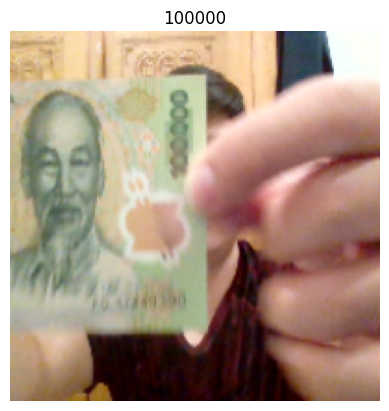

In [49]:
# kiểm tra lại khả năng dự đoán của mô hình 
for images, labels in val_ds.take(1):
  
  plt.imshow(images[1].numpy().astype("uint8"))
  plt.title(class_names[labels[1]])
  plt.axis("off")
  
  img = np.expand_dims(images[1], axis = 0)
  
  print('Predict:',class_names[np.argmax(model_1.predict(img))])

1/1 [==============================] - 0s 52ms/step
Predicted label: 100 nghin VND


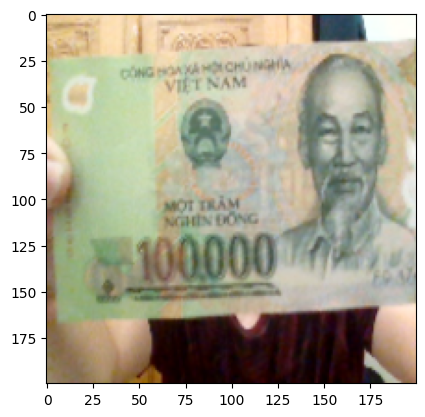

1/1 [==============================] - 0s 96ms/step
Predicted label: 20 nghin VND


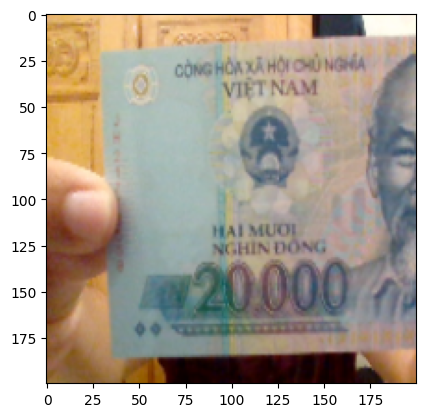

In [50]:
predicted_dict = {'005000': '5 Nghin VND',
                  '010000': '10 nghin VND',
                  '020000': '20 nghin VND',
                  '050000': '50 nghin VND',
                  '100000': '100 nghin VND',
                  '200000': '200 nghin VND',
                  '500000': '500 nghin VND'
                  }
test_anh = '/content/drive/MyDrive/VNbanknotes /test-train2'
for image_path in os.listdir(test_anh):
  image = Image.open(os.path.join(test_anh, image_path))
  image = np.array(image)
  image = tf.image.resize(image, [200, 200])
  image = np.expand_dims(image, axis=0)
  prediction = model_1.predict(image)
  predicted_label = class_names[np.argmax(prediction)]
  print('Predicted label: {}'.format(predicted_dict[predicted_label]))
  plt.imshow(image[0]/255.0)
  plt.show()